# SMAs

In [22]:
# Imports
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
# this helps import the dataframe from API Data Calls.ipynb, you need to run the API notebook to get this dataframe
%store -r combined_values

### Step 1: Import the dataset into a Pandas DataFrame.

In [23]:
# Filter the date index and close columns
signals_df = combined_values.loc[:, ["Close"] ["value"]]

# Use the pct_change function to generate  returns from close prices
signals_df["Actual Returns"] = signals_df["Close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,Close,Actual Returns
Date,,
2018-02-02,915.784973,-0.116711
2018-02-03,964.018982,0.052670
2018-02-04,834.682007,-0.134164
2018-02-05,697.950989,-0.163812
2018-02-06,793.122009,0.136358


,Close,Actual Returns
Date,,
2022-04-10,3211.866943,-0.015344
2022-04-11,2981.052246,-0.071863
2022-04-12,3030.376465,0.016546
2022-04-13,3118.344238,0.029029
2022-04-14,3114.965820,-0.001083


In [24]:
## Step 2: Generate trading signals using short- and long-window SMA values. 

In [25]:
# Set the short window and long window
short_window = 20
long_window = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['SMA_Fast'] = signals_df['Close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['Close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,Close,Actual Returns,SMA_Fast,SMA_Slow
Date,,,,
2018-05-15,708.870972,-0.029674,720.568393,679.568948
2018-05-16,707.049988,-0.002569,722.780441,677.481598
2018-05-17,672.656982,-0.048643,724.061691,674.567978
2018-05-18,694.367004,0.032275,724.596143,673.164828
2018-05-19,696.530029,0.003115,724.978595,673.150619


,Close,Actual Returns,SMA_Fast,SMA_Slow
Date,,,,
2022-04-10,3211.866943,-0.015344,3274.020691,2975.912344
2022-04-11,2981.052246,-0.071863,3274.416748,2968.025896
2022-04-12,3030.376465,0.016546,3274.382214,2960.034011
2022-04-13,3118.344238,0.029029,3274.896326,2953.603650
2022-04-14,3114.965820,-0.001083,3275.311047,2946.812742


In [12]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal
Date,,,,,
2018-05-15,708.870972,-0.029674,720.568393,679.568948,-1.0
2018-05-16,707.049988,-0.002569,722.780441,677.481598,-1.0
2018-05-17,672.656982,-0.048643,724.061691,674.567978,-1.0
2018-05-18,694.367004,0.032275,724.596143,673.164828,1.0
2018-05-19,696.530029,0.003115,724.978595,673.150619,1.0


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal
Date,,,,,
2022-04-10,3211.866943,-0.015344,3274.020691,2975.912344,-1.0
2022-04-11,2981.052246,-0.071863,3274.416748,2968.025896,-1.0
2022-04-12,3030.376465,0.016546,3274.382214,2960.034011,1.0
2022-04-13,3118.344238,0.029029,3274.896326,2953.603650,1.0
2022-04-14,3117.694824,-0.000208,3275.447498,2946.840032,-1.0


In [13]:
signals_df['Signal'].value_counts()

 1.0    743
-1.0    688
Name: Signal, dtype: int64

In [15]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2018-05-15,708.870972,-0.029674,720.568393,679.568948,-1.0,NaN
2018-05-16,707.049988,-0.002569,722.780441,677.481598,-1.0,0.002569
2018-05-17,672.656982,-0.048643,724.061691,674.567978,-1.0,0.048643
2018-05-18,694.367004,0.032275,724.596143,673.164828,1.0,-0.032275
2018-05-19,696.530029,0.003115,724.978595,673.150619,1.0,0.003115


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2022-04-10,3211.866943,-0.015344,3274.020691,2975.912344,-1.0,-0.015344
2022-04-11,2981.052246,-0.071863,3274.416748,2968.025896,-1.0,0.071863
2022-04-12,3030.376465,0.016546,3274.382214,2960.034011,1.0,-0.016546
2022-04-13,3118.344238,0.029029,3274.896326,2953.603650,1.0,0.029029
2022-04-14,3117.694824,-0.000208,3275.447498,2946.840032,-1.0,-0.000208


<AxesSubplot:xlabel='Date'>

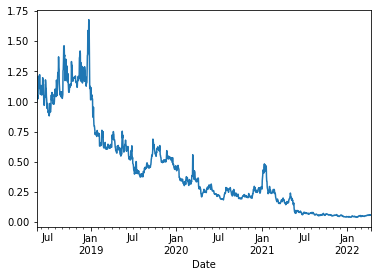

In [16]:
# Plot Strategy Returns to examine performance
(1 + signals_df['Strategy Returns']).cumprod().plot()

In [17]:
### Step 3: Split the data into training and testing datasets.

In [18]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow
Date,,
2018-05-16,720.568393,679.568948
2018-05-17,722.780441,677.481598
2018-05-18,724.061691,674.567978
2018-05-19,724.596143,673.164828
2018-05-20,724.978595,673.150619


In [19]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

# Review the value counts
y.value_counts()

 1.0    743
-1.0    688
Name: Signal, dtype: int64

In [20]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2018-05-16 00:00:00


In [21]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2018-08-16 00:00:00


In [22]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
Date,,
2018-05-16,720.568393,679.568948
2018-05-17,722.780441,677.481598
2018-05-18,724.061691,674.567978
2018-05-19,724.596143,673.164828
2018-05-20,724.978595,673.150619


In [23]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
Date,,
2018-05-16,720.568393,679.568948
2018-05-17,722.780441,677.481598
2018-05-18,724.061691,674.567978
2018-05-19,724.596143,673.164828
2018-05-20,724.978595,673.150619


In [24]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

In [26]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred[:10]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [27]:
### Step 5: Review the classification report associated with the `SVC` model predictions. 

In [28]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report =  classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.47      1.00      0.64       634
         1.0       0.00      0.00      0.00       703

    accuracy                           0.47      1337
   macro avg       0.24      0.50      0.32      1337
weighted avg       0.22      0.47      0.31      1337



C:\Projects\Softwares\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\Softwares\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\Softwares\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [30]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = signals_df['Actual Returns'] 

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = (predictions_df['Actual Returns'] * predictions_df['Predicted'])

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2018-08-17,-1.0,0.096106,-0.096106
2018-08-18,-1.0,-0.063083,0.063083
2018-08-19,-1.0,0.016977,-0.016977
2018-08-20,-1.0,-0.088152,0.088152
2018-08-21,-1.0,0.027811,-0.027811


,Predicted,Actual Returns,Strategy Returns
Date,,,
2022-04-10,-1.0,-0.015344,0.015344
2022-04-11,-1.0,-0.071863,0.071863
2022-04-12,-1.0,0.016546,-0.016546
2022-04-13,-1.0,0.029029,-0.029029
2022-04-14,-1.0,-0.000208,0.000208


### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

<AxesSubplot:xlabel='Date'>

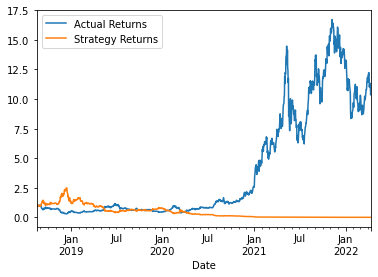

In [31]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot()

### Step 1:  Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

### LogisticRegression

In [33]:
# Import a new classifier from SKLearn
from sklearn.linear_model import LogisticRegression

# Initiate the model instance
logistic_regression_model = LogisticRegression()


### Step 2: Using the original training data as the baseline model, fit another model with the new classifier.

In [34]:
# Fit the model using the training data
model = logistic_regression_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
pred = model.predict(X_test_scaled)

# Review the model's predicted values
pred

array([-1., -1., -1., ..., -1., -1., -1.])

### Step 3: Backtest the new model to evaluate its performance. 


In [36]:
# Use a classification report to evaluate the model using the predictions and testing data
report = classification_report(y_test, pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

        -1.0       0.48      0.44      0.46       634
         1.0       0.53      0.56      0.54       703

    accuracy                           0.51      1337
   macro avg       0.50      0.50      0.50      1337
weighted avg       0.50      0.51      0.50      1337



In [37]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
new_predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
new_predictions_df['Predicted'] = pred

# Add the actual returns to the DataFrame
new_predictions_df['Actual Returns'] = signals_df['Actual Returns'] 

# Add the strategy returns to the DataFrame
new_predictions_df['Strategy Returns'] = (new_predictions_df['Actual Returns'] * new_predictions_df['Predicted'])

# Review the DataFrame
display(new_predictions_df.head())
display(new_predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2018-08-17,-1.0,0.096106,-0.096106
2018-08-18,-1.0,-0.063083,0.063083
2018-08-19,-1.0,0.016977,-0.016977
2018-08-20,-1.0,-0.088152,0.088152
2018-08-21,-1.0,0.027811,-0.027811


,Predicted,Actual Returns,Strategy Returns
Date,,,
2022-04-10,-1.0,-0.015344,0.015344
2022-04-11,-1.0,-0.071863,0.071863
2022-04-12,-1.0,0.016546,-0.016546
2022-04-13,-1.0,0.029029,-0.029029
2022-04-14,-1.0,-0.000208,0.000208


<AxesSubplot:xlabel='Date'>

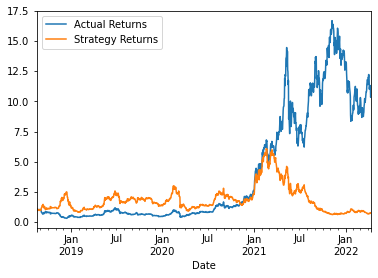

In [38]:
# Plot the actual returns versus the strategy returns
(1 + new_predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot()

### AdaBoost